<a href="https://colab.research.google.com/github/AlipGaper/AlipGaper/blob/main/CNNforImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import HTML

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/VehicleDataset2'

In [5]:
import os
dataset_path = '/content/drive/MyDrive/VehicleDataset2'

# # Extract the ZIP file (replace 'zipfile' with 'import zipfile' if not already imported)
# import zipfile
# with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
#   zip_ref.extractall('/content/datasetdahoa')  # Extract to a new folder named 'dataset'

# Define paths to training and validation directories within the extracted folder
train_data_dir = os.path.join('/content/drive/MyDrive/VehicleDataset2', 'train')
validation_data_dir = os.path.join('/content/MyDrive/VehicleDataset2', 'valid')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/VehicleDataset2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 749 images belonging to 3 classes.


In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.07821351 0.06543211 0.07843138]
  [0.0838408  0.06031139 0.07599767]
  [0.07843138 0.05490196 0.07058824]
  ...
  [0.06666667 0.07401979 0.07156827]
  [0.06666667 0.07364751 0.07231282]
  [0.06666667 0.07327525 0.07305738]]

 [[0.07709668 0.06580438 0.07843138]
  [0.08458535 0.06105594 0.07674222]
  [0.07843138 0.05490196 0.07058824]
  ...
  [0.06808359 0.07200516 0.0798483 ]
  [0.06920041 0.07312199 0.08096512]
  [0.07031724 0.07423881 0.08208194]]

 [[0.07597986 0.06617665 0.07843138]
  [0.0853299  0.06180048 0.07748676]
  [0.07843138 0.05490196 0.07058824]
  ...
  [0.07843138 0.08235294 0.09019608]
  [0.07843138 0.08235294 0.09019608]
  [0.07843138 0.08235294 0.09019608]]

 ...

 [[0.23137257 0.23953983 0.2760331 ]
  [0.23137257 0.24065666 0.27677763]
  [0.23137257 0.24177347 0.2775222 ]
  ...
  [0.19215688 0.19215688 0.20000002]
  [0.23699728 0.24044654 0.25863746]
  [0.21568485 0.22646953 0.24607737]]

 [[0.24219142 0.24584198 0.2838408 ]
  [0.2436805  0.24621427 0.2845854 ]


In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['bigCars', 'mediumCars', 'smallCars']

In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/VehicleDataset2/valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 210 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.2889586  0.29288018 0.26150763]
  [0.27773213 0.2816537  0.25028116]
  [0.26650566 0.27042723 0.2390547 ]
  ...
  [0.30553922 0.30640754 0.3152684 ]
  [0.9687178  0.9608747  0.9726394 ]
  [0.9626049  0.95476174 0.96652645]]

 [[0.33616164 0.3400832  0.2853619 ]
  [0.33446068 0.33838224 0.28638244]
  [0.33275968 0.33668125 0.28740305]
  ...
  [0.3827637  0.38261145 0.39181253]
  [0.9700786  0.96223545 0.97400016]
  [0.9564814  0.94863826 0.96040297]]

 [[0.3121383  0.3218675  0.25041094]
  [0.31554025 0.32458907 0.25415313]
  [0.31894222 0.32731065 0.25789526]
  ...
  [0.45998824 0.4588154  0.46835667]
  [0.97143936 0.9635962  0.97536093]
  [0.9503579  0.9425148  0.9542795 ]]

 ...

 [[0.22294502 0.23470972 0.27000383]
  [0.21736965 0.22913435 0.2644285 ]
  [0.20012231 0.20521674 0.24273428]
  ...
  [0.26391798 0.2756827  0.29529053]
  [0.26289737 0.27466208 0.29426992]
  [0.2618768  0.2736415  0.29324934]]

 [[0.22226462 0.23402932 0.26932344]
  [0.21702945 0.22879416 0.26408827]


In [11]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [14]:
class stopTrainingProc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >= 0.8 and logs.get('val_accuracy') >= 0.8):
            self.model.stop_training = True


In [15]:
stopTraining = stopTrainingProc()

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=100,
    callbacks=[stopTraining]
)

Epoch 1/100
24/24 [==============================] - 468s 20s/step - loss: 1.3668 - accuracy: 0.3338 - val_loss: 1.1215 - val_accuracy: 0.3619
Epoch 2/100
24/24 [==============================] - 59s 2s/step - loss: 1.2082 - accuracy: 0.3271 - val_loss: 1.1706 - val_accuracy: 0.3619
Epoch 3/100
24/24 [==============================] - 57s 2s/step - loss: 1.1941 - accuracy: 0.3031 - val_loss: 1.1267 - val_accuracy: 0.3476
Epoch 4/100
24/24 [==============================] - 66s 3s/step - loss: 1.1507 - accuracy: 0.3672 - val_loss: 1.1118 - val_accuracy: 0.3714
Epoch 5/100
24/24 [==============================] - 66s 3s/step - loss: 1.1259 - accuracy: 0.3551 - val_loss: 1.1267 - val_accuracy: 0.3095
Epoch 6/100
24/24 [==============================] - 56s 2s/step - loss: 1.1257 - accuracy: 0.3618 - val_loss: 1.0933 - val_accuracy: 0.3619
Epoch 7/100
24/24 [==============================] - 56s 2s/step - loss: 1.1193 - accuracy: 0.3445 - val_loss: 1.1093 - val_accuracy: 0.3667
Epoch 8/100

In [16]:
scores = model.evaluate(test_generator)

7/7 [==============================] - 11s 2s/step - loss: 1.2291 - accuracy: 0.7190


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
type(history.history['loss'])

list

In [20]:
len(history.history['loss'])

100

In [21]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.366807222366333,
 1.208160161972046,
 1.1941195726394653,
 1.1506901979446411,
 1.1258831024169922]

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

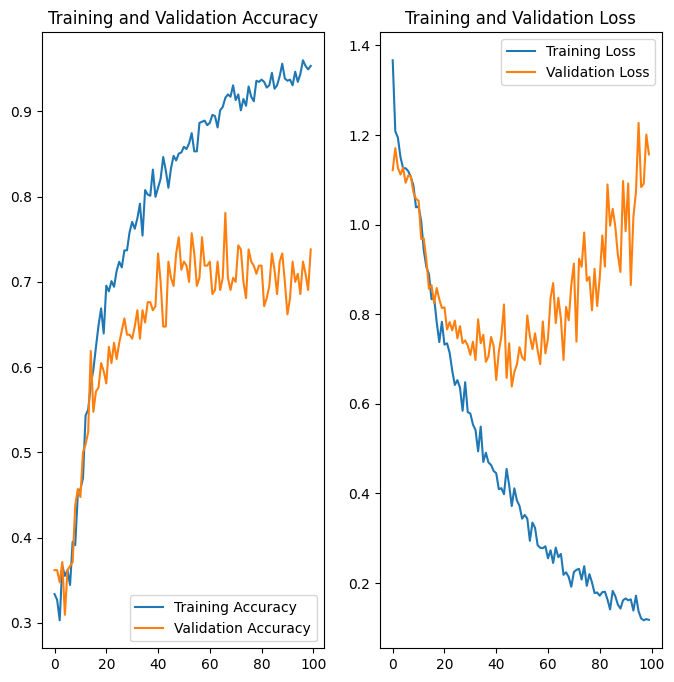

In [23]:
import matplotlib.pyplot as plt
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


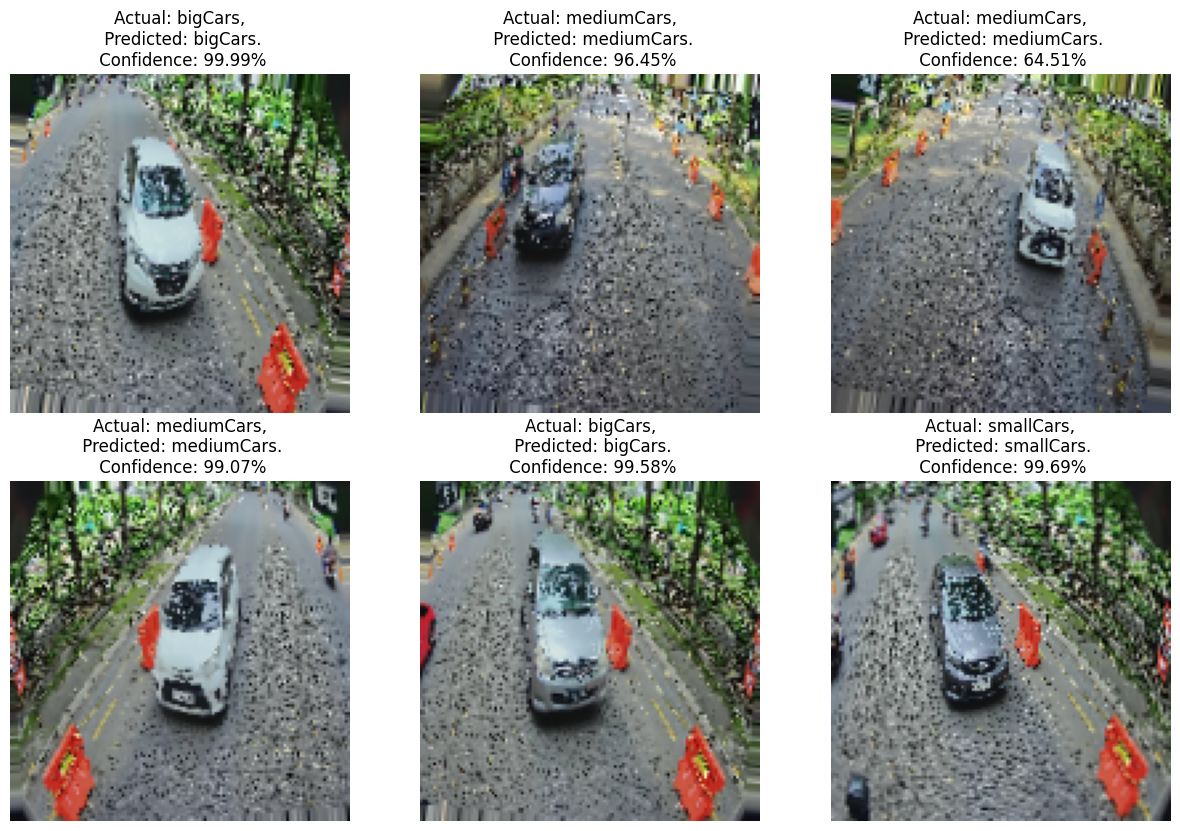

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [29]:
from google.colab import files

model.save("IMGClass2.h5")
files.download("IMGClass2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>